In [3]:
!pip install tensorflow_decision_forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 33.6 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [2]:
print(tf.__version__)
print(tfdf.__version__)

2.15.0
1.8.1


In [3]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking long

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.3429 - accuracy: 0.8935 - val_loss: 0.1344 - val_accuracy: 0.9588
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2008 - accuracy: 0.9396 - val_loss: 0.1202 - val_accuracy: 0.9640
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1668 - accuracy: 0.9487 - val_loss: 0.1133 - val_accuracy: 0.9650
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1507 - accuracy: 0.9538 - val_loss: 0.0884 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1306 - accuracy: 0.9599 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1152 - accuracy: 0.9648 - val_loss: 0.0782 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1082 - accuracy: 0.9657 - val_loss: 0.0755 - val_ac

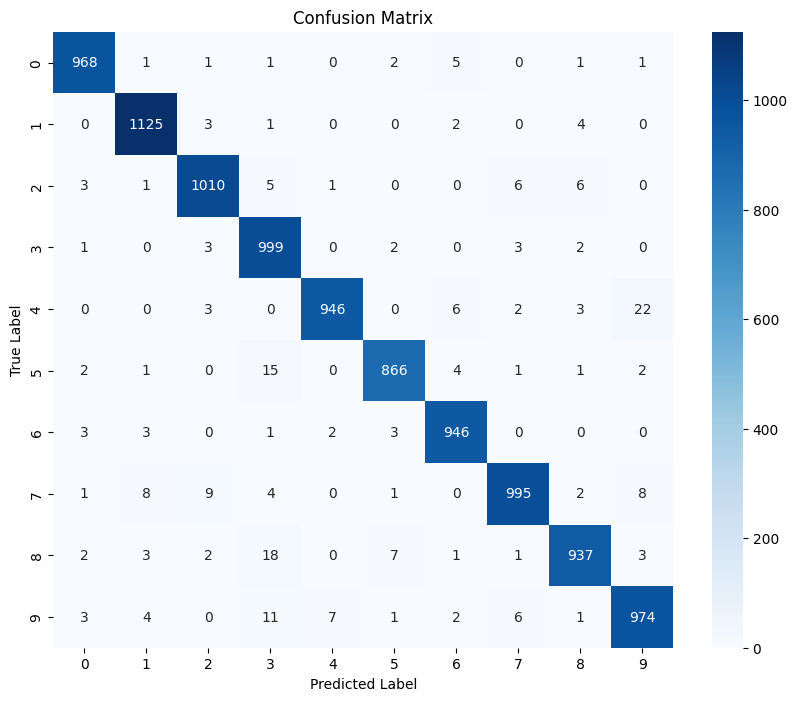

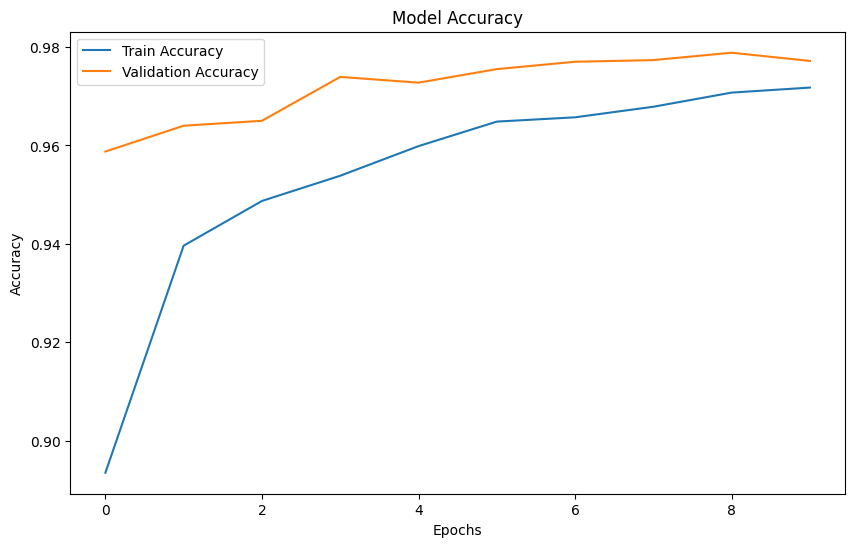

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import os
import json

def mnist():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28, 28, 1), name="input_layer"),
        tf.keras.layers.Flatten(name="flatten_layer"),

        tf.keras.layers.Dense(256, activation='relu', name="dense_layer_1"),
        tf.keras.layers.BatchNormalization(name="batch_norm_1"),
        tf.keras.layers.Dropout(0.3, name="dropout_1"),

        tf.keras.layers.Dense(128, activation='relu', name="dense_layer_2"),
        tf.keras.layers.BatchNormalization(name="batch_norm_2"),
        tf.keras.layers.Dropout(0.3, name="dropout_2"),

        tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# x_train_flat = x_train.reshape(x_train.shape[0], -1)
# smote = SMOTE(sampling_strategy='auto')
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train_flat, y_train)

# x_train_resampled = x_train_resampled.reshape(-1, 28, 28, 1)

x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = mnist()
history = model.fit(
    x_train_final, y_train_final,
    epochs=10,
    validation_data=(x_val, y_val)
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict and compute confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Save confusion matrix and classification report
output_dir = "/content/mnist_results"

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save model accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [5]:
import pandas as pd
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score     support
0              0.984741  0.987755  0.986246    980.0000
1              0.981675  0.991189  0.986409   1135.0000
2              0.979631  0.978682  0.979157   1032.0000
3              0.946919  0.989109  0.967554   1010.0000
4              0.989540  0.963340  0.976264    982.0000
5              0.981859  0.970852  0.976325    892.0000
6              0.979296  0.987474  0.983368    958.0000
7              0.981262  0.967899  0.974535   1028.0000
8              0.979101  0.962012  0.970482    974.0000
9              0.964356  0.965312  0.964834   1009.0000
accuracy       0.976600  0.976600  0.976600      0.9766
macro avg      0.976838  0.976362  0.976517  10000.0000
weighted avg   0.976775  0.976600  0.976604  10000.0000


In [15]:
model.save('mnist_model.keras')


In [14]:
import tensorflowjs as tfjs

# After training your model
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/STUDY2/ML_MODELS/MNIST/jsmodel')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# model.save('mnist_model.h5', save_format='h5')

In [12]:
# model.save('mnist_model', save_format='tf')
# !tensorflowjs_converter --input_format=tf_saved_model mnist_model /content/drive/MyDrive/STUDY2/ML_MODELS/MNIST/jsmodel

2024-12-29 09:58:46.430385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-29 09:58:46.430447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-29 09:58:46.431814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 09:58:47.713223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# !tensorflowjs_converter --input_format=keras /content/mnist_model.keras /content/drive/MyDrive/STUDY2/ML_MODELS/MNIST/jsmodel


2024-12-29 09:59:09.247728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-29 09:59:09.247817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-29 09:59:09.251412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 09:59:11.392566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    